In [1]:
import bioread
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import neurokit2 as nk

# Check Acqknowledge file

In [2]:
source = "/scratch/mepicard/emotionvideos/sourcedata/physio/"
outdir = "/scratch/mepicard/physio_data/emotionvideos/"
dict_info = {"sub": ["sub-02", "sub-03", "sub-05"], 
             "ses": ["ses-003", "ses-004", "ses-003"], 
             "files": [["neuromod_video52023-02-13T14_29_00.acq"],
                       ["neuromod_video52023-02-07T10_27_27.acq"],
                       ["neuromod_video52023-02-20T17_04_28.acq"]]}

In [48]:
data = []
for idx, sub in enumerate(dict_info["sub"]):
    acq_load = []
    ses = dict_info["ses"][idx]
    for f in dict_info["files"][idx]:
        try :
            acq_load.append(bioread.read_file(os.path.join(source, sub, ses, f)))
        except:
            print(f"Unable to read: {f}")
    data.append(acq_load)
    
dict_info["data"] = data

In [49]:
dict_info['data']

[[AcqKnowledge file (rev 133): 5 channels, 10000.0 samples/sec],
 [AcqKnowledge file (rev 133): 5 channels, 10000.0 samples/sec],
 [AcqKnowledge file (rev 133): 5 channels, 10000.0 samples/sec]]

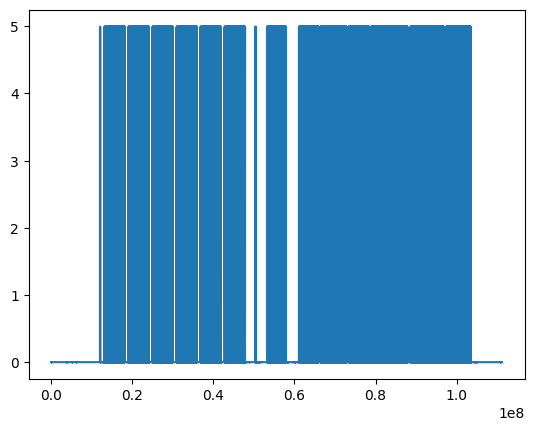

In [50]:
plt.plot(dict_info['data'][2][0].channels[2].data)

# Overview of the sessions

In [57]:
def load_converted_png(path, sub, ses):
    path_2_png = os.path.join(outdir, sub, ses, "code/conversion")
    files_png = [f for f in os.listdir(path_2_png) if 'png' in f]
    for file in files_png:
        #Only plot the session overview
        if "trigger_time" not in file:
            plt.figure(figsize=(10,10))
            plt.imshow(plt.imread(os.path.join(path_2_png, file)))
            plt.title(f"Overview {sub}_{ses}")
            plt.show()

In [64]:
def overview_sessions(path, sub):
    ses = [d for d in os.listdir(os.path.join(outdir, sub)) if os.path.isdir(os.path.join(outdir, sub, d))]
    for s in ses:
        load_converted_png(path, sub, s)

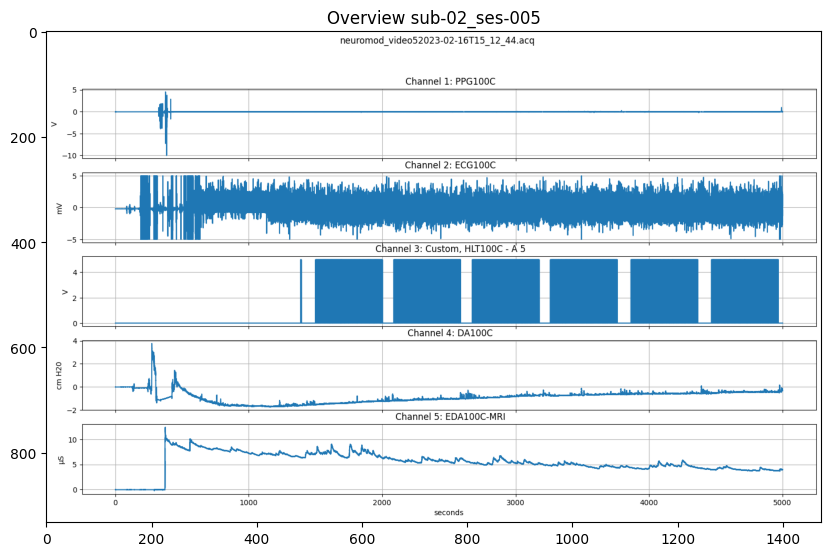

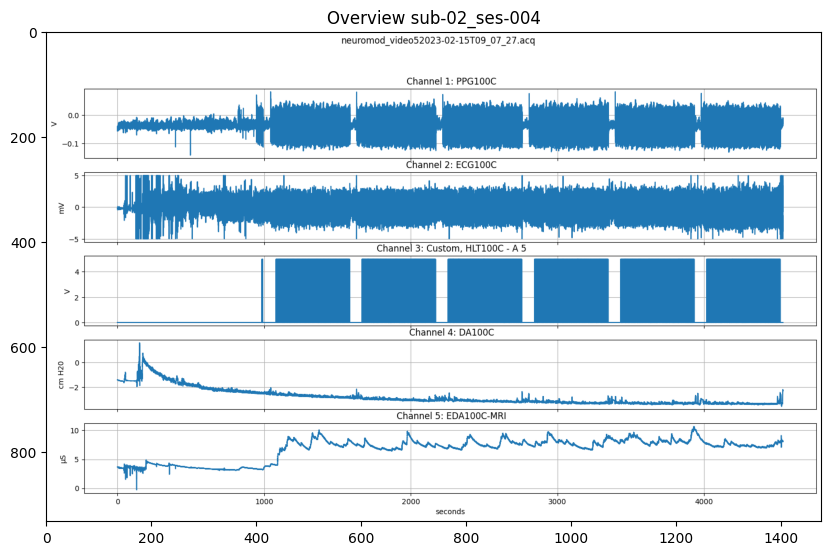

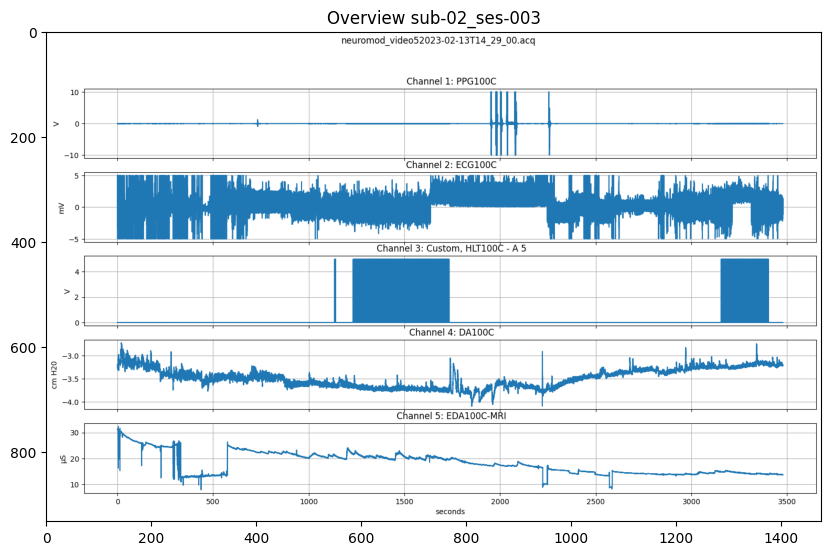

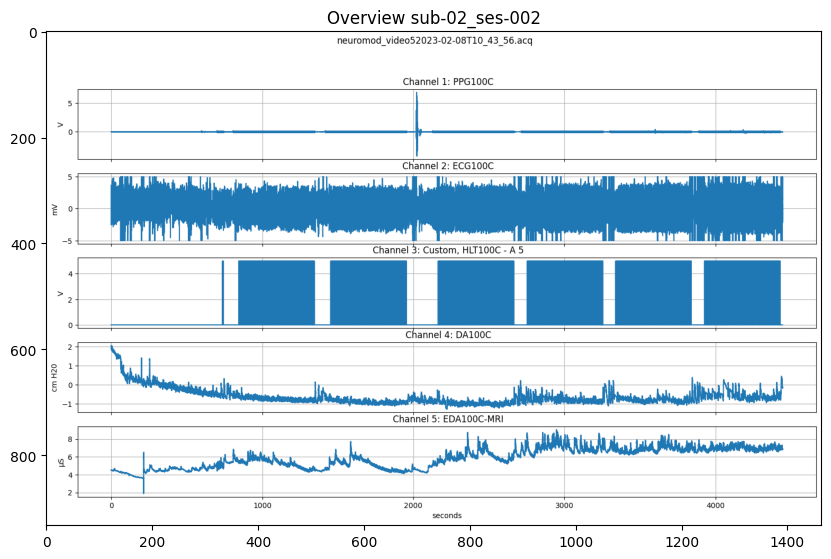

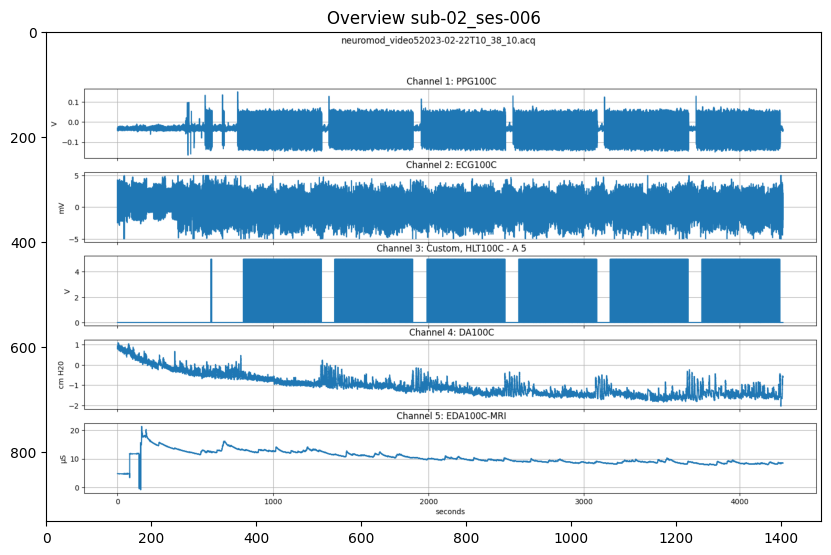

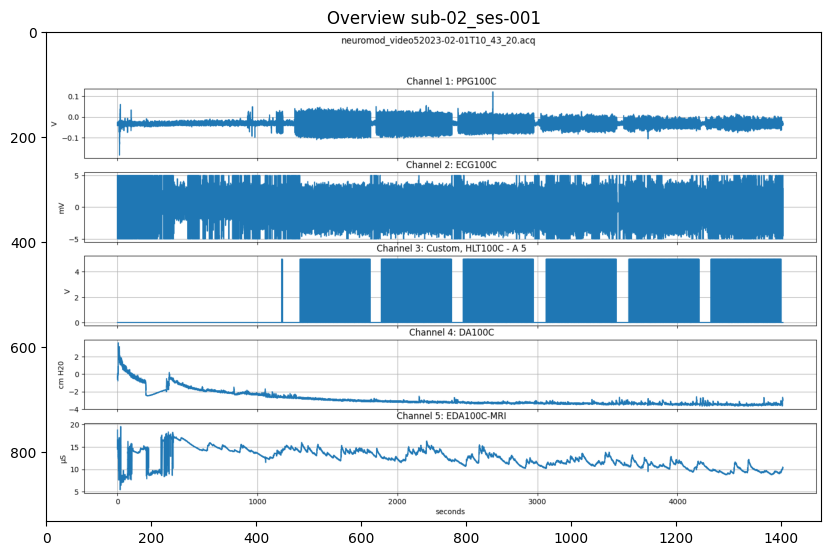

In [65]:
overview_sessions(outdir, "sub-02")

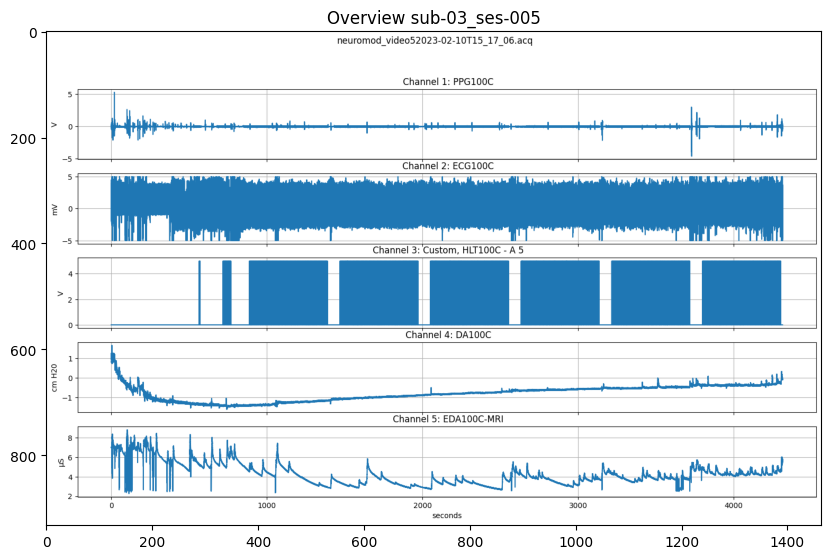

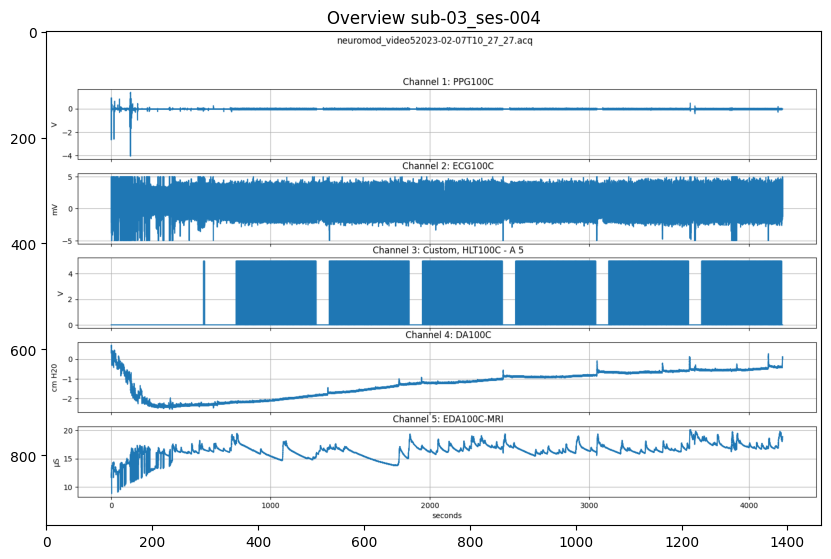

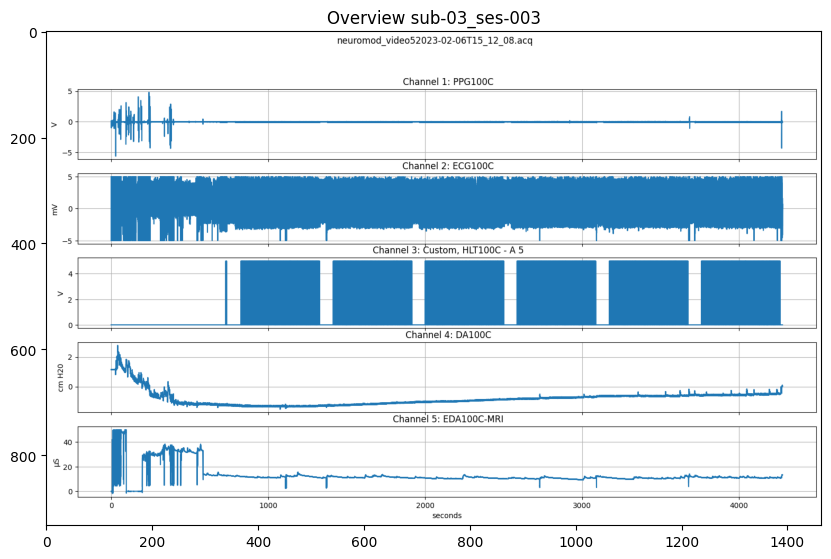

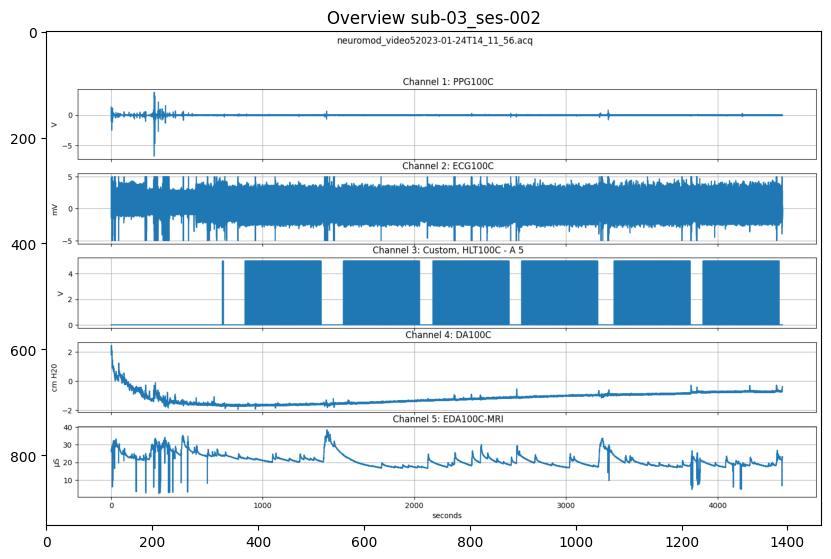

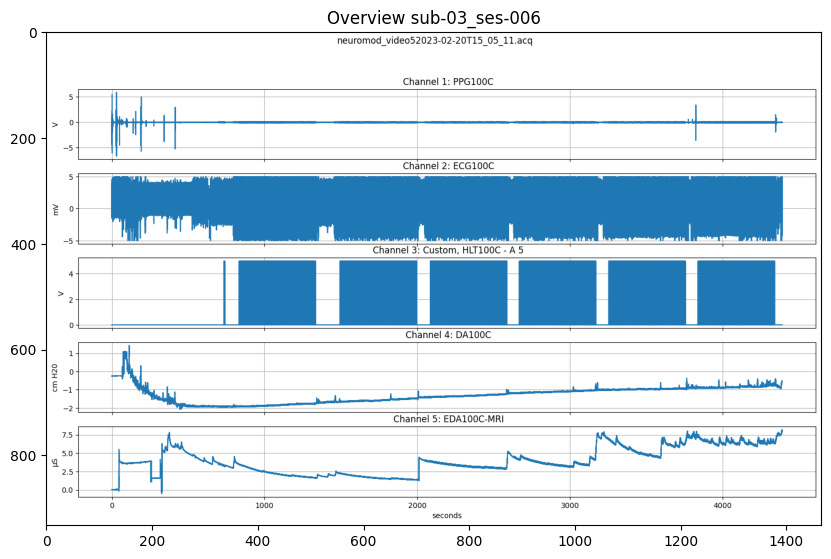

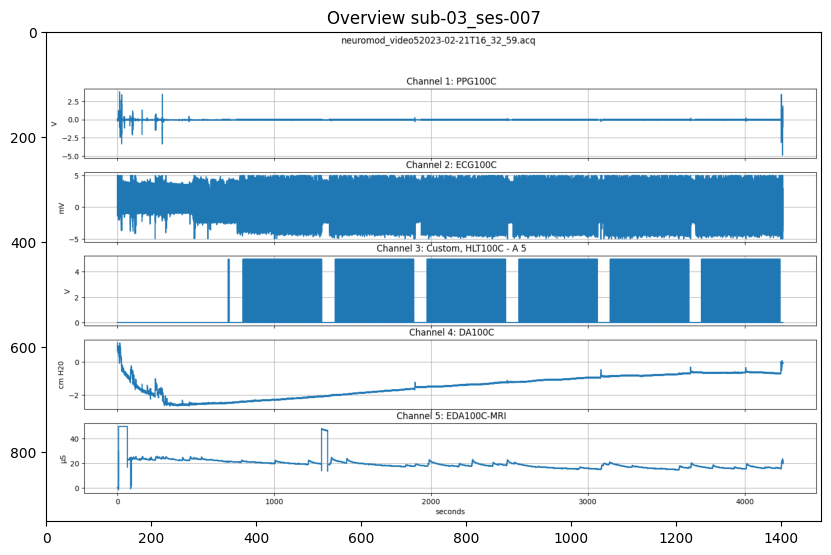

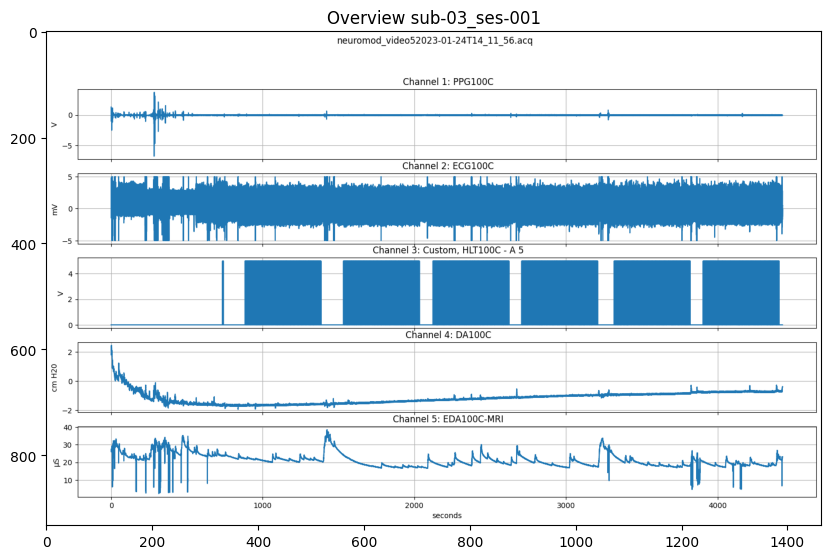

In [71]:
overview_sessions(outdir, "sub-03")

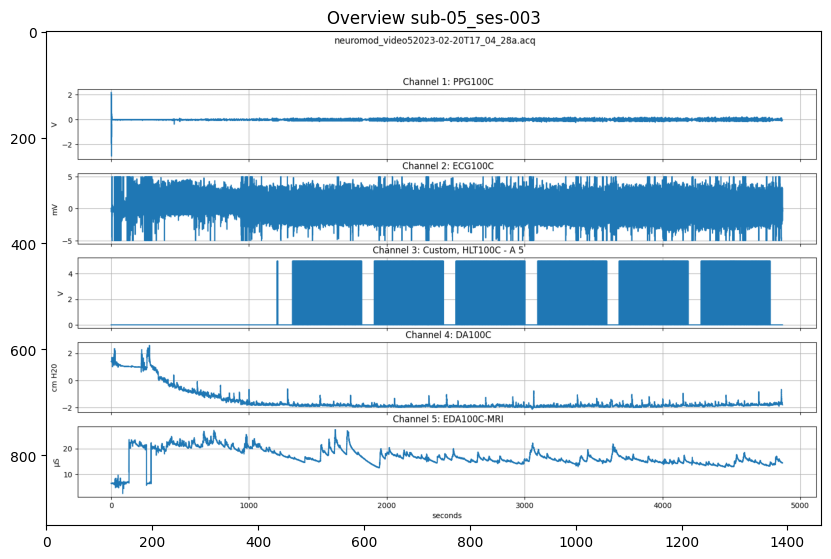

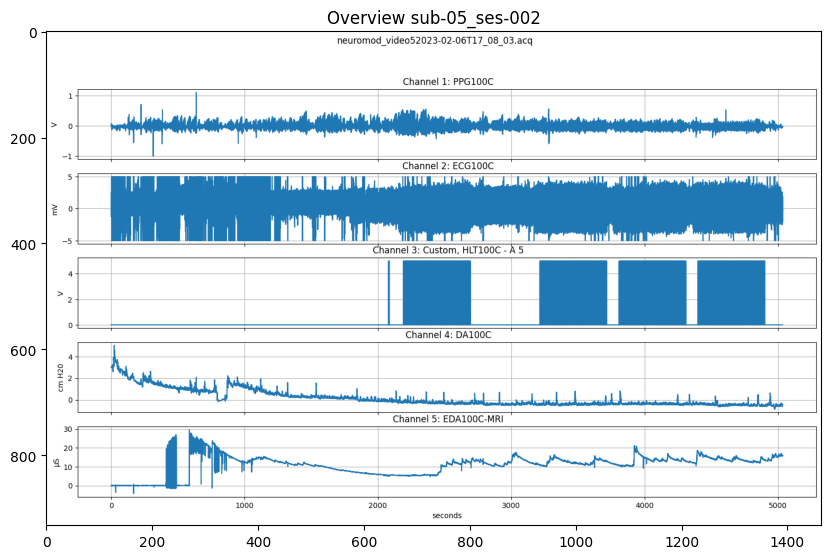

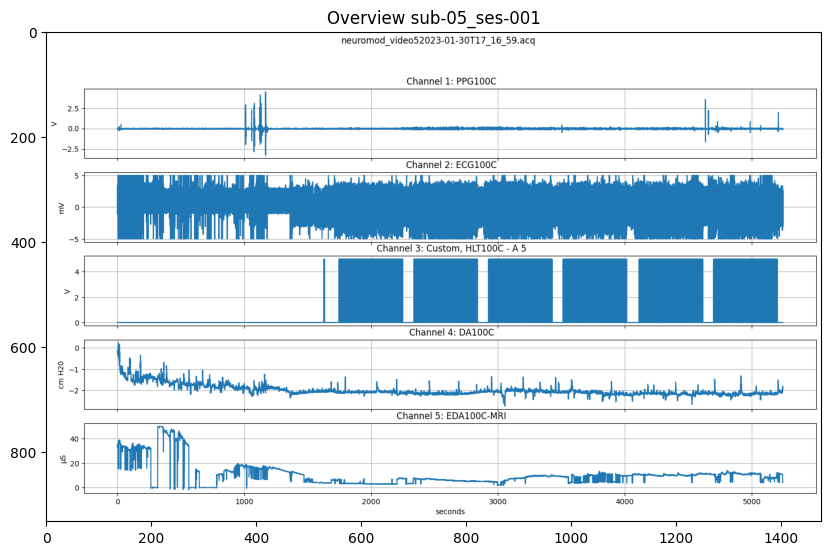

In [74]:
overview_sessions(outdir, "sub-05")

**Overall observations**
- Drift present in the RSP waveform for every run for sub-03, and for sub-02 and sub-05 to some extend
- Quality of EDA signal seemed to have improved between run-01 and run-03 for sub-05

## Overview of the runs

In [ ]:
plt.figure(figsize=(26,4))
signals, info = nk.ecg_process(sub02_ses003['ecg'], sampling_rate=10000)

In [ ]:
nk.ecg_plot(signals[0:10000000])

In [7]:
def load_converted_runs(path, sub, ses):
    """
    Goal: give an overview of physiological data for each run for a given session
    """
    files_json = [f for f in os.listdir(os.path.join(outdir, sub, ses)) if 'json' in f]
    filename = [f.split(".")[0] for f in files_json]
    
    data = {}
    tmp_d, tmp_f = [], []
    
    data['sub'] = sub
    data['ses'] = ses
    files_json = [f for f in os.listdir(os.path.join(outdir, sub, ses)) if 'json' in f]
    
    for file in files_json:
        tmp_f.append(file)
        f = open(os.path.join(outdir, sub, ses, file))
        tmp_d.append(json.load(f))
        f.close()
        
    data['data'] = tmp_d
    data['filename'] = tmp_f

    return data

In [4]:
files_json = [f for f in os.listdir(os.path.join(outdir, "sub-02", "ses-002")) if 'json' in f]

In [12]:
def load_json(filename):
    tmp = open(filename)
    data = json.load(tmp)
    tmp.close()
    
    return data

def load_segmented_runs(source, sub, ses):
    """
    """
    data_tsv = []
    files_tsv = [f for f in os.listdir(os.path.join(source, sub, ses)) if 'tsv.gz' in f]
    
    for tsv in files_tsv:
        filename = tsv.split(".")[0]
        print(f"---Reading data for {sub} {ses}: run")
        json = filename+".json"
        print("---Reading json file---")
        data_json = load_json(os.path.join(source, sub, ses, json))
        print("---Reading tsv file---")
        data_tsv.append(pd.read_csv(os.path.join(source, sub, ses, tsv),
                                    sep="\t", compression="gzip",
                                    names=data_json["Columns"]))
    
    return data_tsv
        
    
        

    


In [13]:
load_segmented_runs(outdir, "sub-02", "ses-002")

neuromod_video52023-02-08T10_43_56_07.tsv.gz
neuromod_video52023-02-08T10_43_56_07.json
neuromod_video52023-02-08T10_43_56_03.tsv.gz
neuromod_video52023-02-08T10_43_56_03.json
neuromod_video52023-02-08T10_43_56_02.tsv.gz
neuromod_video52023-02-08T10_43_56_02.json
neuromod_video52023-02-08T10_43_56_04.tsv.gz
neuromod_video52023-02-08T10_43_56_04.json
neuromod_video52023-02-08T10_43_56_01.tsv.gz
neuromod_video52023-02-08T10_43_56_01.json
neuromod_video52023-02-08T10_43_56_06.tsv.gz
neuromod_video52023-02-08T10_43_56_06.json
neuromod_video52023-02-08T10_43_56_05.tsv.gz
neuromod_video52023-02-08T10_43_56_05.json


In [23]:
list1, list2 = (list(t) for t in zip(*sorted(zip(files_tsv, files_json))))

In [15]:
files_tsv[0].split

['neuromod_video52023-02-08T10_43_56_07.tsv.gz',
 'neuromod_video52023-02-08T10_43_56_03.tsv.gz',
 'neuromod_video52023-02-08T10_43_56_02.tsv.gz',
 'neuromod_video52023-02-08T10_43_56_04.tsv.gz',
 'neuromod_video52023-02-08T10_43_56_01.tsv.gz',
 'neuromod_video52023-02-08T10_43_56_06.tsv.gz',
 'neuromod_video52023-02-08T10_43_56_05.tsv.gz']

In [18]:
data = pd.read_csv(os.path.join(outdir, "sub-02", "ses-002", files_tsv[0]), sep="\t")

In [19]:
data

,-9.00060020e+00,3.63159180e-02,9.06219482e-01,6.10351562e-04,-6.28520761e-01,7.15026788e+00
0,-9.000500,0.036011,0.890045,0.000000,-0.628996,7.145690
1,-9.000400,0.036621,0.873718,0.000000,-0.628521,7.147216
2,-9.000300,0.036621,0.857697,0.000000,-0.628996,7.147216
3,-9.000200,0.037231,0.841064,-0.000305,-0.628521,7.145690
4,-9.000100,0.037231,0.824280,-0.000305,-0.628521,7.145690
...,...,...,...,...,...,...
5214994,512.498912,-0.039673,-0.225372,-0.000305,0.310222,7.113647
5214995,512.499012,-0.040588,-0.225372,-0.000305,0.311173,7.116699
5214996,512.499112,-0.040283,-0.225677,0.000000,0.311173,7.118224
5214997,512.499212,-0.040588,-0.225067,0.000000,0.310222,7.115173
